<H1 style="color:#8B7959">ADIA</H1>

<H2 style="color:#8B7959">PIPELINE EXAMPLE</H2>

In [1]:
import sys

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

github_folder_path = r'..'  # Relative path
if github_folder_path not in sys.path:
    sys.path.append(github_folder_path)

from L0_Library.config import *
from L1_Dev.data_prep import DataPrep
from L1_Dev.news import News
from L1_Dev.clusters import Clusters
from L1_Dev.fitting import Fitting

In [3]:
START_DATE = datetime(2019, 1, 1)
END_DATE = datetime(2019, 12, 31)

In [4]:
pipeline = DataPrep(API_key='db-SEbmRhQ3ekjnrdRQLfK4iDYJhVkrL',
                    dataset='XNAS.ITCH',
                    start_date=datetime(2022, 2, 1),  # Might be good to use datetime.date
                    start_hour=9,
                    start_minute=30,
                    end_date=datetime(2022, 2, 28),
                    end_hour=16,
                    end_minute=0,
                    time_zone='US/Eastern')

In [5]:
pipeline_news = News(base_url='https://stocknewsapi.com/api/v1',
                     API_key='7vjl2kzbnxdltdz2hxixyzhbc07yltk4keyh5az9',
                     start_date=datetime(2019, 1, 1),
                     end_date=datetime(2020, 3, 7))

In [6]:
clusters = Clusters()

In [7]:
fitting = Fitting()

<H3 style="color:#8B7959">LOB DATA</H3>

In [ ]:
# Get data from DataBento

## LOB/tick data
df_lob_data, trading_days, trading_dates = pipeline.get_data_mbp('BAC')

## OHLCV data
# df_lob_data, trading_days, trading_dates = pipeline.get_data_ohlcv(symbol='TSLA')

df_lob_data

<H3 style="color:#8B7959">PRICES</H3>

In [ ]:
# Calculate prices
df_prices = pipeline.mid_price(df_input=df_lob_data, resample_freq='1T', type_mid='vwmp', drop_na=False)
df_prices

<H3 style="color:#8B7959">RETURNS</H3>

In [ ]:
# Calculate returns
df_returns = pipeline.returns(df_input=df_prices)
df_returns

<H3 style="color:#8B7959">BIPOWER VARIATION</H3>

In [ ]:
# Calculate bipower variation
df_bipower_variation = pipeline.rolling_bipower_variation(df_input=df_returns, K=390)
df_bipower_variation

<H3 style="color:#8B7959">PERIODICITY</H3>

In [9]:
# Calculate periodicity
df_std_returns_1 = df_returns / np.sqrt(df_bipower_variation)
df_f0 = pipeline.df_periodicity(df_input=df_std_returns_1, threshold=16)
df_std_returns_2 = df_std_returns_1 / df_f0
df_f1 = pipeline.df_periodicity(df_input=df_std_returns_2, threshold=6.635)
df_f = df_f0 * df_f1
df_f

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020,3.42020,3.42020,3.42020,...,NaN,3.42020,3.42020,NaN,3.42020,3.42020,NaN,NaN,3.42020,3.42020
09:32:00,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144,3.06144,3.06144,3.06144,...,NaN,3.06144,3.06144,NaN,3.06144,3.06144,NaN,NaN,3.06144,3.06144
09:33:00,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404,3.02404,3.02404,3.02404,...,NaN,3.02404,3.02404,NaN,3.02404,3.02404,NaN,NaN,3.02404,3.02404
09:34:00,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493,2.59493,2.59493,2.59493,...,NaN,2.59493,2.59493,NaN,2.59493,2.59493,NaN,NaN,2.59493,2.59493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725,1.02725,1.02725,1.02725,...,NaN,1.02725,1.02725,NaN,1.02725,1.02725,NaN,NaN,1.02725,1.02725
15:56:00,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007,0.76007,0.76007,0.76007,...,NaN,0.76007,0.76007,NaN,0.76007,0.76007,NaN,NaN,0.76007,0.76007
15:57:00,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978,0.78978,0.78978,0.78978,...,NaN,0.78978,0.78978,NaN,0.78978,0.78978,NaN,NaN,0.78978,0.78978


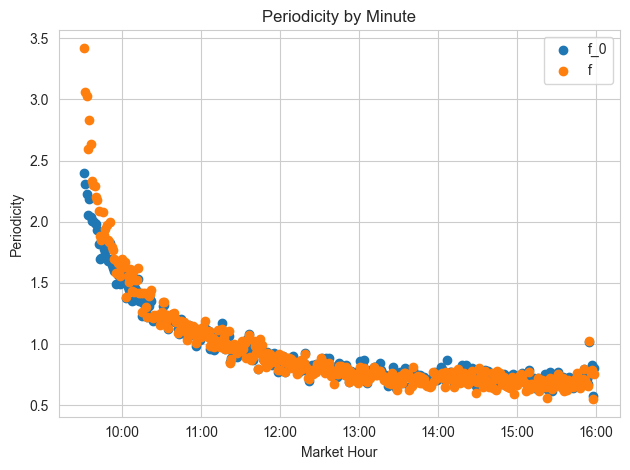

In [10]:
# Plot periodicity
sns.set_style("whitegrid")
plt.scatter(pd.to_datetime(df_f0.index, format='%H:%M:%S'), df_f0.iloc[:, 1], label='f_0', marker='o')
plt.scatter(pd.to_datetime(df_f.index, format='%H:%M:%S'), df_f.iloc[:, 1], label='f', marker='o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.xticks(rotation=0)
plt.xlabel('Market Hour')
plt.ylabel('Periodicity')
plt.title('Periodicity by Minute')
plt.legend()
plt.tight_layout()
plt.show()

<H3 style="color:#8B7959">JUMP SCORE</H3>

In [11]:
# Calculate jump score
df_jump_score = pipeline.jump_score(df_returns=df_returns, df_bipower_variation=df_bipower_variation, df_f=df_f)
df_jump_score

Date,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,2019-01-11,...,2019-12-22,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31
Hour,,,,,,,,,,,,,,,,,,,,,
09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
09:31:00,NaN,-0.11211,-1.87105,NaN,NaN,-1.29883,-0.76026,-1.39858,1.18481,0.98491,...,NaN,-1.38083,-0.85564,NaN,-0.79520,-1.78403,NaN,NaN,-0.01227,0.89434
09:32:00,NaN,-0.59866,0.04014,NaN,NaN,0.19789,-0.53190,-1.19160,-0.15442,0.41309,...,NaN,0.43639,-0.90692,NaN,-0.81879,-1.66556,NaN,NaN,-2.23530,1.85654
09:33:00,NaN,-0.95630,0.19125,NaN,NaN,-0.47592,0.90067,0.86120,-0.24013,-0.94815,...,NaN,0.64258,-0.63550,NaN,-0.25552,1.32099,NaN,NaN,-1.70003,1.45451
09:34:00,NaN,0.21592,0.60999,NaN,NaN,0.65447,0.29006,0.35098,0.91379,-0.06273,...,NaN,2.07347,-1.44257,NaN,-0.04384,1.26206,NaN,NaN,-1.43828,0.12310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:55:00,NaN,-0.18309,-0.36738,NaN,NaN,-0.29432,0.34830,0.14936,-0.47593,-0.16354,...,NaN,1.34811,0.04648,NaN,0.74155,0.69157,NaN,NaN,0.04360,0.49141
15:56:00,NaN,-1.60753,1.55530,NaN,NaN,-1.67549,-0.16470,2.02322,-1.93082,-0.22946,...,NaN,0.23940,0.45723,NaN,0.65089,0.04563,NaN,NaN,0.33034,-1.03382
15:57:00,NaN,-0.62543,2.05764,NaN,NaN,-0.25458,0.46225,-0.39456,0.74931,-0.53157,...,NaN,0.20276,-0.44001,NaN,-0.60443,0.41158,NaN,NaN,-0.07374,-1.45570


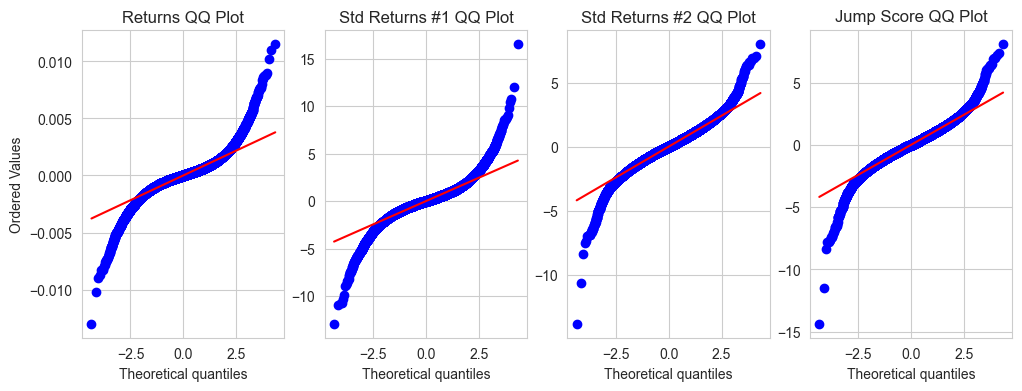

In [12]:
# Calculate quantiles and generate the QQ plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
stats.probplot(df_returns.unstack().dropna(), dist='norm', plot=axes[0])
axes[0].set_title('Returns QQ Plot')
axes[0].set_ylabel('Ordered Values')
stats.probplot(df_std_returns_1.unstack().dropna(), dist='norm', plot=axes[1])
axes[1].set_title('Std Returns #1 QQ Plot')
axes[1].set_ylabel('')
stats.probplot(df_std_returns_2.unstack().dropna(), dist='norm', plot=axes[2])
axes[2].set_title('Std Returns #2 QQ Plot')
axes[2].set_ylabel('')
stats.probplot(df_jump_score.unstack().dropna(), dist='norm', plot=axes[3])
axes[3].set_title('Jump Score QQ Plot')
axes[3].set_ylabel('')
plt.show()

<H3 style="color:#8B7959">JUMPS</H3>

In [13]:
# Get jumps
df_jumps = pipeline.get_jumps(df_input=df_jump_score)
print(f'Total Number of Jumps Detected: {df_jumps.sum().sum()}')
pd.DataFrame(df_jumps.unstack()[df_jumps.unstack() == 1]).rename(columns={0: 'Jump'})

# Filter jumps
# df_jumps[(df_jumps.index < pd.to_datetime('09:37:00').time())]
# df_jumps.loc[pd.to_datetime('09:37:00').time(), '2019-01-03']

Total Number of Jumps Detected: 141.0


Jump
Date       Hour          
2019-01-03 14:40:00     1
2019-01-11 14:10:00     1
2019-01-14 14:35:00     1
2019-01-17 14:51:00     1
           14:55:00     1
...                   ...
2019-12-16 14:13:00     1
           14:14:00     1
           14:16:00     1
           14:29:00     1
2019-12-19 11:26:00     1

[141 rows x 1 columns]

In [14]:
l_jumps_timestamp = clusters.jumps_timestamp(df_input=df_jumps)
iter_jumps_timestamp = iter(l_jumps_timestamp)

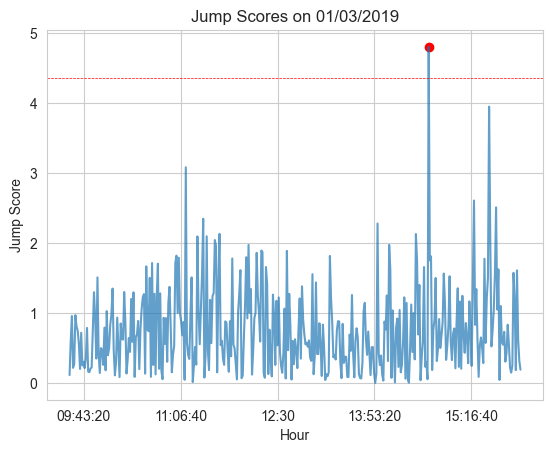

In [15]:
# plot_date = 75
plot_date = l_jumps_timestamp.index(next(iter_jumps_timestamp))

ax = abs(df_jump_score[l_jumps_timestamp[plot_date]]).plot(ylabel='Jump Score',
                                      
                                                           title=f'Jump Scores on {l_jumps_timestamp[plot_date]}', alpha=0.7)
markers = [i if i > 4.36 else np.nan for i in abs(df_jump_score[l_jumps_timestamp[plot_date]])]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">JUMPS INTER-TIMES</H3>

In [16]:
df_inter_times = clusters.calculate_jump_inter_times(df_input=df_jumps, list_input=l_jumps_timestamp)
pd.DataFrame(df_inter_times.unstack()[df_inter_times.unstack() > 0]).rename(columns={0: 'Jump Inter-Times'})

Jump Inter-Times
Date       Hour                      
2019-01-03 14:40:00               inf
2019-01-11 14:10:00               inf
2019-01-14 14:35:00               inf
2019-01-17 14:51:00               inf
           14:55:00                 2
...                               ...
2019-12-16 11:55:00               inf
           14:13:00                 2
           14:14:00                 3
           14:16:00                14
2019-12-19 11:26:00               inf

[118 rows x 1 columns]

<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED PROBABILITY</H3>

In [17]:
df_bernoulli_p = clusters.bernoulli_trials_p(df_input=df_jumps, rolling_window=7800) # Fix prob 0 which makes threshold inf
pd.DataFrame(df_bernoulli_p.unstack()[df_bernoulli_p.unstack() > 0]).rename(columns={0: 'Bernoulli P'})

Bernoulli P
Date       Hour                 
2019-02-01 09:50:00      0.00154
           09:51:00      0.00154
           09:52:00      0.00154
           09:53:00      0.00154
           09:54:00      0.00154
...                          ...
2019-12-31 15:55:00      0.00128
           15:56:00      0.00128
           15:57:00      0.00128
           15:58:00      0.00128
           15:59:00      0.00128

[89581 rows x 1 columns]

In [ ]:
# Sample list with zeros
data = pd.Series([1, 0, 0, 2, np.nan, 0, 0, 3, 0, 0, 0, 0, 4])

# Initialize a variable to keep track of the last non-zero value
last_non_zero = None

# Iterate through the list and fill forward with the last non-zero value
data = data.dropna().reset_index(drop=True)
print(data)
for i in range(len(data)):
    if data[i] != 0:
        last_non_zero = data[i]
    elif last_non_zero is not None:
        data[i] = last_non_zero

# Print the modified list
print(data)


<H3 style="color:#8B7959">BERNOULLI HYPOTHESIS-TEST IMPLIED THRESHOLD</H3>

In [18]:
df_threshold = clusters.bernoulli_hypothesis_threshold(df_input=df_bernoulli_p)
pd.DataFrame(df_threshold.unstack()[df_threshold.unstack() > 0]).rename(columns={0: 'Bernoulli P'})

Bernoulli P
Date       Hour                 
2019-02-01 09:50:00     32.31499
           09:51:00     32.31499
           09:52:00     32.31499
           09:53:00     32.31499
           09:54:00     32.31499
...                          ...
2019-12-31 15:55:00     38.98312
           15:56:00     38.98312
           15:57:00     38.98312
           15:58:00     38.98312
           15:59:00     38.98312

[89581 rows x 1 columns]

In [ ]:
df_threshold.unstack().dropna()[df_threshold.unstack().dropna() == np.inf]

<H3 style="color:#8B7959">CLUSTERED JUMPS</H3>

In [ ]:
df_clustered_jumps = clusters.cluster_jumps(df_jumps=df_jumps, df_inter_times=df_inter_times, df_threshold=df_threshold,
                                            l_jumps_timestamp=l_jumps_timestamp)
print(f'Total Number of Jump Clusters Detected: {df_clustered_jumps.sum().sum()}')
pd.DataFrame(df_clustered_jumps.unstack()[df_clustered_jumps.unstack() == 1]).rename(columns={0: 'Clustered Jumps'})

In [ ]:
test = pd.DataFrame(df_clustered_jumps.unstack()[df_clustered_jumps.unstack() == 1]).rename(columns={0: 'Clustered Jumps'})
test.drop(labels=pd.to_datetime('09:55:00').time(), level='Hour')

In [ ]:
l_clustered_jumps_timestamp = clusters.jumps_timestamp(df_input=df_clustered_jumps)
iter_clustered_jumps_timestamp = iter(l_clustered_jumps_timestamp)

In [ ]:
# plot_date = 47
plot_date = l_clustered_jumps_timestamp.index(next(iter_clustered_jumps_timestamp))

ax = abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]).plot(ylabel='Jump Score',
                                                                     title=f'Clustered Jump Scores on {l_clustered_jumps_timestamp[plot_date]}',
                                                                     alpha=0.7)
markers = [value if (value > 4.36) & (df_clustered_jumps[l_clustered_jumps_timestamp[plot_date]].iloc[index] == 1) \
           else np.nan for index, value in enumerate(abs(df_jump_score[l_clustered_jumps_timestamp[plot_date]]))]
ax.scatter(df_jump_score.index, markers, color='r')
ax.axhline(y=4.36, color='red', linestyle='--', lw=0.5, label='Threshold')
plt.show()

<H3 style="color:#8B7959">JUMP SERIES</H3>

In [ ]:
dicf_jumps_timestamp, dict_jump_series = fitting.jump_series(df_input=df_clustered_jumps, df_jump_score=df_jump_score, 
                                                             input_list=l_clustered_jumps_timestamp, window_size=160)

<H3 style="color:#8B7959">JUMP FITTING</H3>

In [ ]:
dates_iter = iter(list(dicf_jumps_timestamp.keys()))

In [ ]:
time_iter = iter([i[0] for i in dicf_jumps_timestamp.values()])

In [ ]:
test_double = dict_jump_series[next(dates_iter)][next(time_iter)]

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double.index
y_data = test_double

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


In [ ]:
# FITTING EXAMPLE

In [ ]:
abs(df_jump_score[l_jumps_timestamp[3]]).plot()

In [ ]:
test = df_jump_score[l_jumps_timestamp[3]].dropna().reset_index(drop=True)
test[test == -6.956441675069235]

In [ ]:
test_double = pd.DataFrame(test[252:388])
test = pd.DataFrame(test[320:388])
test

In [ ]:
test.index = test.index - 320
test_double.index = test_double.index - 320

In [ ]:
test = abs(test)
test_double = abs(test_double)
test.plot()

In [ ]:
test = test.reset_index()
test_double = test_double.reset_index()

In [ ]:
test.columns=['x', 'y']
test_double.columns=['x', 'y']

In [ ]:
test_double

In [ ]:
# As stated in the paper, it is easier to fit the cummulative function
test.cumsum()['x'].plot()

In [ ]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Define the double power-law function
def double_power_law(params, t):
    N_l, N_r, p_l, p_r, d = params
    theta_l = np.where(t < 0, 1.0, 0.0)
    theta_r = np.where(t >= 0, 1.0, 0.0)
    return (N_l * theta_l * np.abs(t)**p_l) + (N_r * theta_r * np.abs(t)**p_r) + d

# Define the residual function for the least squares optimization
def residual(params, t, y):
    return y - double_power_law(params, t)

# Generate or load your data (replace with your own data)
t_data = test_double['x']
y_data = test_double['y']

# Initial guess for the parameters [N_l, N_r, p_l, p_r, d]
initial_params = [1.0, 1.0, 1.0, 1.0, 0.0]

# Fit the double power-law model to your data using least_squares
result = least_squares(residual, initial_params, args=(t_data, y_data))

# Extract the fitted parameters
N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit = result.x

# Calculate the fitted values using the original t values
y_fit = double_power_law([N_l_fit, N_r_fit, p_l_fit, p_r_fit, d_fit], t_data)

# Plot the original data and the fitted curve
plt.plot(t_data, y_data, label='Original Data', marker='o', alpha=0.5)
plt.plot(t_data, y_fit, 'r-', label='Fitted Curve')
plt.title('Double Power-Law')
plt.xlabel('t')
plt.ylabel('Jump Score')
plt.legend()
plt.show()

# Display the fitted parameters
print("Fitted Parameters:")
print(f"N_l: {N_l_fit}")
print(f"N_r: {N_r_fit}")
print(f"p_l: {p_l_fit}")
print(f"p_r: {p_r_fit}")
print(f"d: {d_fit}")


<H3 style="color:#8B7959">STORE DATA IN HDF5 FORMAT</H3>

We could compare how much it would take to store the files in different formats. I pick the most efficient.
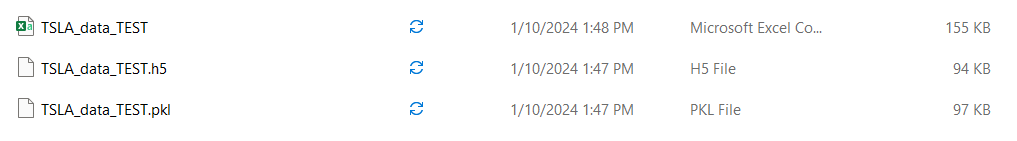

In [ ]:
# WRITE
hdf5_file_path = '../Data/TSLA_data.h5'

# Write the DataFrames to the HDF5 file
df_prices.to_hdf(hdf5_file_path, key='prices', mode='w')
df_returns.to_hdf(hdf5_file_path, key='returns', mode='a')
df_bipower_variation.to_hdf(hdf5_file_path, key='bipower_variation', mode='a')
df_f0.to_hdf(hdf5_file_path, key='periodicity_0', mode='a')
df_f1.to_hdf(hdf5_file_path, key='periodicity_1', mode='a')
df_f.to_hdf(hdf5_file_path, key='periodicity', mode='a')
df_jump_score.to_hdf(hdf5_file_path, key='jump_score', mode='a')
df_jumps.to_hdf(hdf5_file_path, key='jumps', mode='a')

# Create an HDF5 file and write DataFrames to it
with h5py.File(hdf5_file_path, 'a') as hdf_file:    
    # Add attributes to the file level
    hdf_file.attrs['Description'] = 'HDF5 File storing data pipeline'
    hdf_file.attrs['Start_Date'] = '01-01-2019'
    hdf_file.attrs['End_Date'] = '01-01-2019'
    hdf_file.attrs['Start_Time'] = '09:30'
    hdf_file.attrs['End_Time'] = '16:00'
    hdf_file.attrs['Time_Zone'] = 'US/Eastern'

In [8]:
# READ
hdf5_file_path = '../Data/TSLA_data.h5'

# Read the DataFrames from the HDF5 file
df_prices = pd.read_hdf(hdf5_file_path, key='prices')
df_returns = pd.read_hdf(hdf5_file_path, key='returns')
df_bipower_variation = pd.read_hdf(hdf5_file_path, key='bipower_variation')
df_f0 = pd.read_hdf(hdf5_file_path, key='periodicity_0')
df_f1 = pd.read_hdf(hdf5_file_path, key='periodicity_1')
df_f = pd.read_hdf(hdf5_file_path, key='periodicity')
df_jump_score = pd.read_hdf(hdf5_file_path, key='jump_score')
df_jumps = pd.read_hdf(hdf5_file_path, key='jumps')

# Open the HDF5 file to read attributes
with h5py.File('../Data/TSLA_data.h5', 'r') as hdf_file:
    # Get the attributes of the root group (the file itself)
    for attr_name, attr_value in hdf_file.attrs.items():
        if attr_name not in ['CLASS', 'VERSION', 'PYTABLES_FORMAT_VERSION', 'TITLE']:
            print(f"{attr_name}: {attr_value}")

Description: HDF5 File storing data pipeline
End_Date: 01-01-2019
End_Time: 16:00
Start_Date: 01-01-2019
Start_Time: 09:30
Time_Zone: US/Eastern


<H3 style="color:#8B7959">NEWS</H3>

In [ ]:
response = pipeline_news.get_news(symbol=['LULU'], items=4, page=1, news_type='article')

In [ ]:
try:
    for article in response[:4]:
        print(f"Title: {article['title']}")
        print(f"URL: {article['news_url']}")
        print(f"Image URL: {article['image_url']}")
        print(f"Text: {article['text']}")
        print(f"Source Name: {article['source_name']}")
        print(f"Date: {article['date']}")
        print(f"Topics: {article['topics']}")
        print(f"Sentiment: {article['sentiment']}")
        print(f"Type: {article['type']}")
        print(f"Tickers: {article['tickers']}\n")
except requests.exceptions.HTTPError as err:
    print(f"An error occurred: {err}")

In [ ]:
l_clustered_jumps_timestamp

In [ ]:
df_inter_times['12/16/2019'].to_numpy()

In [ ]:
df_input_unstack = df_jumps.unstack().reset_index().rename(columns={0: 'jumps'})
df_input_unstack['jumps'] = np.nan

In [ ]:
df_jumps.unstack().dropna()

In [ ]:
df_input_unstack['jumps'] = np.nan

s_bernoulli_trials_p = df_input.unstack().dropna().rolling(rolling_window).sum() / rolling_window
s_bernoulli_trials_p = s_bernoulli_trials_p.reset_index().rename(columns={0: 'jumps'})

df_result = pd.merge(df_input_unstack, s_bernoulli_trials_p,
                     on=['Date', 'Hour'], how='left')[['Date', 'Hour', 'jumps_y']]
df_result = df_result.rename(columns={'jumps_y': 'jumps'})

df_result['jumps'] = df_result.apply(lambda row: self.min_bernoulli_trials_p(row), axis=1)

df_result = df_result.pivot(index='Hour', columns='Date', values=f'jumps')

In [ ]:
lista = pd.Series([1,2,3,4,5,6])
lista.shift(1)